<font color=brown>
#                                    FINAL PROJECT (FALL 2017)
</font>
<br>
<br>
<font color=brown>

#                   SIGNAL PROCESSING IN BIOMEDICAL APPLICATIONS

</font>
<br>
<br>
<font color=brown>

#                                       ENGI-5631-FA2017

</font>
<br>
<br>

<font color=green>
##    Project Done by
</font>
<font color=green>
#### Name : Venkat Sai Manoj Cheerla
</font>
<font color=green>
#### S.ID    : 0863427
</font>
<br>

<font color=indigo>
### PROJECT TITLE : IMAGE ENHANCEMENT TECHNIQUE
</font>
<br>

<font color=indigo>
### IMAGE SHARPENING
</font>
<br>

<font color=indigo>
### Introduction to Image Enhancement
</font>
<br>
    Image enhancement[1] is basically improving the interpretability or perception of information in images for human viewers and providing `better' input for other automated image processing techniques. The principal objective of image enhancement is to modify attributes of an image to make it moresuitable for a given task and a specific observer. During this process, one or more attributes of the image are modified. The choice of attributes and the way they are modified are specific to a given task. Moreover, observer-specific factors, such as the human visual system and the observer's experience, will introduce a great deal of subjectivity into the choice of image enhancement methods. There exist many techniques that can enhance a digital image without spoiling it. The enhancement methods can broadly be divided in to the following two categories: 
<br>
<font color=indigo>
#### Spatial domain enhancement methods:
</font>
<br>
• Spatial domain techniques are performed to the
image plane itself and they are based on direct
manipulation of pixels in an image.
<br>
• The operation can be formulated as
<br>
      g(x,y) =T[f(x,y)],
<br>
where g is the output, f is the input image and 
<br>
T is an operation on f defined over some neighborhood of (x,y).   
<br>
<font color=indigo>
#### Frequency domain enhancement methods:
</font>
<br>

• These methods enhance an image f(x,y) by
<br>
convoluting the image with a linear, position
<br>
invariant operator.
<br>
• The 2D convolution is performed in frequency
<br>
domain with DFT.
<br>
Spatial domain: g(x,y)=f(x,y)*h(x,y)
<br>
Frequency domain: G(w1,w2)=F(w1,w2)H(w1,w2)
<br>
Human perception is highly sensitive to edges and fine details of an image, and since they are composed primarily by high frequency components, the visual quality of an image can be enormously degraded if the high frequencies are attenuated or completed removed. In contrast, enhancing the high-frequency components of an image leads to an improvement in the visual quality. Image sharpening refers to any enhancement technique that highlights edges and fine details in an image. Image sharpening is widely used in printing and photographic industries for increasing the local contrast and sharpening the images.
<br>

<font color=indigo>
### IMAGE SHARPENING
</font>
<br>
In principle, image sharpening consists of adding to the original image a signal that is proportional to a high-pass filtered version of the original image.The original image is first filtered by a high-pass filter that extracts the high-frequency components, and then a scaled version of the high-pass filter output is added to the original image, thus producing a sharpened image of the original. Note that the homogeneous regions of the signal, i.e., where the signal is constant, remain unchanged. The sharpening operation can be represented by
<br>
<font color=gray>
### S(i,j) = x(i,j) + Lambda * F(x(i,j))
</font>
<br>
where  is x(i,j) the original pixel value at the coordinate (i,j) F()is the high-pass filter, Lambda is a tuning parameter greater that or equal zero, and  is the sharpened pixel at the coordinate (i,j) . The value taken by Lambda depends on the grade of sharpness desired. Increasing  yields a more sharpened image.

If color images are used  and  are three-component vectors, whereas if gray-scale images are used  and  are single-component vectors. Thus the process described here can be applied to either gray-scale or color images, with the only difference being that vector filters have to be used in sharpening color images whereas single-component filters are used with gray-scale images.

The key point in the effective sharpening process lies in the choice of the high-pass filtering operation. Traditionally, linear filters have been used to implement the high-pass filter, however, linear techniques can lead to unacceptable results if the original image is corrupted with noise. A tradeoff between noise attenuation and edge highlighting can be obtained if a weighted median filter with appropriated weights is used. To illustrate this, consider a WM filter applied to a gray-scale image where the following filter mask is used.

According to John D buhr [2] Unsharp Masking Process, the final step prior to actually printing an image is the sharpening process. An unsharp masking algorithm is applied to every image just prior to printing. The unsharp masking equation is as follows.
<br>
<font color=gray>
### D.sub.c (x)=D(x)+β(D(x)-∫φ(ξ)D(x-ξ)dξ)
</font>
<br>
In this equation, D.sub.c (x) is the "sharpened" density at position x, D(x) is the starting density at position x, the recommended value of β is 2.5, and the integral values at each pixel position are computed by convolving the image with the kernel.The red, green, and blue images are all sharpened to the same level.

The recommended value for β was established by adjusting the value upwards until pictures, when printed, began to appear with unacceptable levels of digital artifacts. These artifacts appeared as ringing, or halos, on edges yielding images that appear unnatural.

Now we are going to practically implement this technique on IM_0028.dcm which is a Dicom Image.We will be doing it in two different ways.In the first case we would be directly rendering the dicom image and code it to sharpen the image.And in the second method we first convert the Dicom image into a Jpeg image and use a user defined function to perform sharpening.

<font color=indigo>
## Method 1
</font>
<br>

In [1]:
%matplotlib inline
from skimage import novice, data, io, exposure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import dicom

# Get file
RefDs = dicom.read_file('IM_0028.dcm')
# Let's print all the Metadata here
print(RefDs)

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M_SE', 'M', 'SE']
(0008, 0012) Instance Creation Date              DA: '20120101'
(0008, 0013) Instance Creation Time              TM: '122531'
(0008, 0014) Instance Creator UID                UI: 1.3.46.670589.11.2501708638.4193405253.2729028880.3304384116
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.46.670589.11.3397498352.605445821.304410668.1378834227
(0008, 0020) Study Date                          DA: '20110101'
(0008, 0021) Series Date                         DA: '20110101'
(0008, 0022) Acquisition Date                    DA: '20110101'
(0008, 0023) Content Date                        DA: '20110101'
(0008, 0030) Study Time                          TM: '133916'
(0008, 0031) Series Time                         TM: '135504.20'
(0008, 0032) Acquisition Time    

[0, 511, 0, 511]

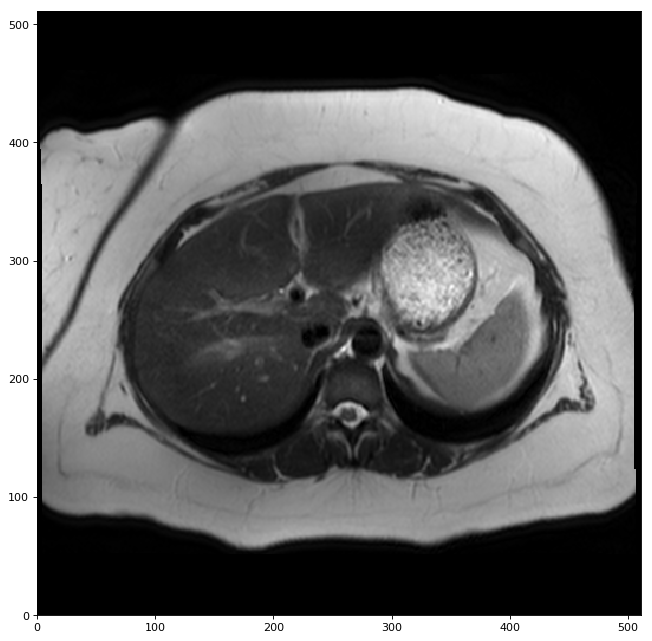

In [2]:
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns))
ArrayDicom = np.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
ds = dicom.read_file('IM_0028.dcm')
ArrayDicom[:,:]=ds.pixel_array

#plt.figure()
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.axes().set_aspect('equal') #this makes the image square
plt.set_cmap(plt.gray()) #grayscale
x=np.arange(RefDs.Rows)
y=np.arange(RefDs.Columns)

plt.pcolormesh(x, y, np.flipud(ArrayDicom[:, :]))
plt.axis([x.min(),x.max(),y.min(),y.max()])

Original (8-bit encoding) the range is: 988


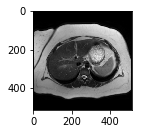

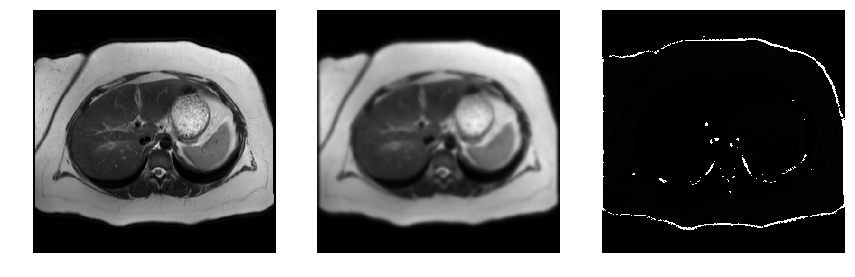

In [3]:
#SHARPENING
import scipy
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import novice, data, io, exposure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#the simplest way to open and display an image uses the novice module from skimage
brainpic = dicom.read_file('IM_0028.dcm')
brainpicarray = brainpic.pixel_array

#however, we will use instead the matplotlib image modules to obtain arrays that we can manipulate
#the 8-bit data in the PNG will be converted to floating point data between 0 and 1 by imread
#unless you ask it to Flatten=True
#brainpicarray = mpimg.imread('BrainCOmplete.png','True') 
print('Original (8-bit encoding) the range is: '+str(np.max(brainpicarray))) #showing max value in the image
bp=plt.subplot(221)
plt.imshow(brainpicarray)
#f = scipy.misc.face(gray=True).astype(float)
blurred_f = ndimage.gaussian_filter(brainpicarray, 3)

filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)

alpha = 30
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)

plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(brainpicarray, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(132)
plt.imshow(blurred_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(133)
plt.imshow(sharpened, cmap=plt.cm.gray)
plt.axis('off')

plt.tight_layout()
plt.show()

In the above snippet we have give a value of 30 to the parameter 'alpha'.
Now we change the value of alpha to 0.5 and can clearly see the difference that the is a complete contrast occuring and we can observer the borders in the white spaces.

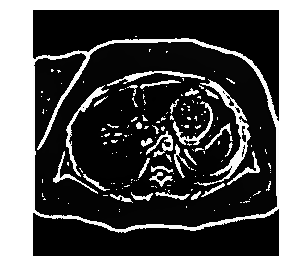

In [4]:
alpha = 0.5
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)

plt.figure(figsize=(12, 4))
plt.imshow(sharpened, cmap=plt.cm.gray)
plt.axis('off')

plt.tight_layout()
plt.show()

With alpha = 1 we get the blurred image itself,this can be clearly understood from the 'sharpened','blurred_f' and 'filter_blurred_f' mathematial relation.

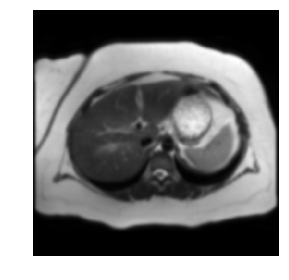

In [5]:
alpha = 1
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)

plt.figure(figsize=(12, 4))
plt.imshow(sharpened, cmap=plt.cm.gray)
plt.axis('off')

plt.tight_layout()
plt.show()

<font color=indigo>
## Method 2
</font>
<br>
In this we first get to convert the dcm image to jpg image from a website[6] and then define a function sharpen2(photo.height,width,filter1,filter2) where, 
<br>
'photo' is the image to be sharpened,
<br>
'height' and 'weight' are the image parameters obtained from the image itself(default values) and
<br>
'filter1' and 'filter2' are the filtering parameters which are defined by us .These filtering parameters manipulate the r,g,b values of the image.

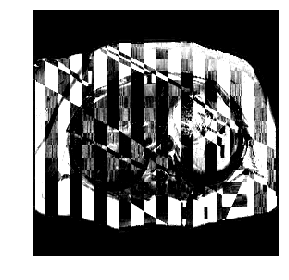

In [6]:
from PIL import *
from PIL import Image
import os
os.chdir(r"C:")
filter1=9
filter2=-1


def sharpen2(photo,height,width,filter1,filter2):
    for y in range(1,height-1):
        for x in range(1,width-1):

            (r,g,b)=photo.getpixel((x,y))
            r=int(r*filter1)
            g=int(g*filter1)
            b=int(b*filter1)

            (r1,g1,b1)=photo.getpixel((x-1,y-1))
            r1=int(r1*filter2)
            g1=int(g1*filter2)
            b1=int(b1*filter2)

            (r2,g2,b2)=photo.getpixel((x,y-1))
            r2=int(r2*filter2)
            g2=int(g2*filter2)
            b2=int(b2*filter2)
            
            (r3,g3,b3)=photo.getpixel((x+1,y-1))
            r3=int(r3*filter2)
            g3=int(g3*filter2)
            b3=int(b3*filter2)

            (r4,g4,b4)=photo.getpixel((x-1,y))
            r4=int(r4*filter2)
            g4=int(g4*filter2)
            b4=int(b4*filter2)

            (r5,g5,b5)=photo.getpixel((x+1,y))
            r5=int(r5*filter2)
            g5=int(g5*filter2)
            b5=int(b5*filter2)
            
            (r6,g6,b6)=photo.getpixel((x-1,y+1))
            r6=int(r6*filter2)
            g6=int(g6*filter2)
            b6=int(b6*filter2)

            (r7,g7,b7)=photo.getpixel((x,y+1))
            r7=int(r7*filter2)
            g7=int(g7*filter2)
            b7=int(b7*filter2)

            (r8,g8,b8)=photo.getpixel((x+1,y+1))
            r8=int(r8*filter2)
            g8=int(g8*filter2)
            b8=int(b8*filter2)

            rfPixel=r+r1+r2+r3+r4+r5+r6+r7+r8
            if rfPixel>255:
                rfPixel=255
            elif rfPixel<0:
                rfPixel=0

            gfPixel= g+g1+g2+g3+g4+g5+g6+g7+g8
            if gfPixel>255:
                gfPixel=255
            elif gfPixel<0:
                gfPixel=0
                
            bfPixel=b+b1+b2+b3+b4+b5+b6+b7+b8
            if bfPixel>255:
                bfPixel=255
            elif bfPixel<0:
                bfPixel=0

            photo.putpixel((x,y),(rfPixel,gfPixel,bfPixel))    
    return photo

photo=Image.open("IM_0028.jpg").convert("RGB")
photo2=photo.copy()
height=photo.height
width=photo.width
x=sharpen2(photo2,height,width,filter1,filter2)
plt.figure(figsize=(12, 4))
plt.imshow(x, cmap=plt.cm.gray)
plt.axis('off')

plt.tight_layout()
plt.show()

Now we implement the same function by changing the parameters 'filter1' and 'filter2' to 9 and -0.5 respectively

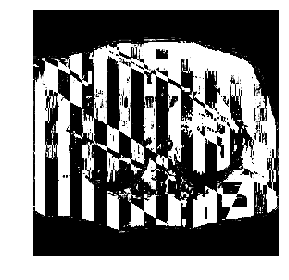

In [ ]:
y=sharpen2(photo2,height,width,9,-0.5)
plt.figure(figsize=(12, 4))
plt.imshow(x, cmap=plt.cm.gray)
plt.axis('off')

plt.tight_layout()
plt.show()

For filter1=20 and filter2=-5 we get,

In [ ]:
z=sharpen2(photo2,height,width,20,-5)
plt.figure(figsize=(12, 4))
plt.imshow(x, cmap=plt.cm.gray)
plt.axis('off')

plt.tight_layout()
plt.show()

<font color=indigo>
### Effects of Image Sharpening
</font>
<br>
1. Sharpening involves a contrast enhancement.
<br>
2. Enhancing contrast generally results in an increase in saturation.
<br>
3. Sharpening generally enhances noise.
<br>
4. Oversharpening results in halos(The halo effect is the tendency for an impression created in one area to influence opinion in another area.)
<br>
<font color=indigo>
### Ways to overcome these effects
</font>
<br>
1. Apply sharpening, reduce saturation. 
2. Review the Red, Green & Blue channels, sharpen on least noisy channel.
3. Selectively sharpen, masking out effects in noisy areas. 

<font color=BROWN>
## BIBLIOGRAPHY
</font>
<br>

1. A Comprehensive Review of Image Enhancement Techniques
<br>JOURNAL OF COMPUTING, VOLUME 2, ISSUE 3, MARCH 2010, ISSN 2151-9617
http://ai2-s2-pdfs.s3.amazonaws.com/1997/f8d4c71b1355b7bb5868d4456563fda3665d.pdf
<br>
<br>
2. Digital photofinishing system including scene balance, contrast normalization, and image sharpening digital image processing
https://www.google.com/patents/US6097470
<br>
<br>
3. A. K. Jain, Fundamentals of Digital Image Processing.
 Englewood Cliffs, NJ: Prentice Hall, 1989. 
 https://www.google.co.in/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=0ahUKEwjsn9We3_PXAhXJz4MKHWHwA7cQFggnMAA&url=https%3A%2F%2Fwww.cis.rit.edu%2Fclass%2Fsimg361%2FNotes_11222010.pdf&usg=AOvVaw2zxYzxGzzqpi45Z0tWNEbI
<br>
<br>
4. Image processing by Gaussian and butterworth high pass filter
http://biomedpharmajournal.org/vol7no2/image-sharpening-by-gaussian-and-butterworth-high-pass-filter/
<br>
<br>
5. van der Walt S, Schönberger JL, Nunez-Iglesias J, Boulogne F, Warner JD, Yager N, Gouillart E, Yu T, the scikit-image contributors. (2014) scikit-image: image processing in Python. PeerJ 2:e453
https://peerj.com/articles/453/
<br>
<br>
6. For converting dcm to jpg for method 2
https://www.coolutils.com/online/DICOM-to-JPG#

### CHECK YOUR UNDERSTANDING
1. Try to implement the code in method 2 using a dicom image directly in the program without converting it to jpg format.
<br>Hint: Carefully observe the code in the first method where we have created the pic array from dicom image.
<br>
2. Implement the code by changing the value of height and width in the function.